#STAGE 02 - DataWhiz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cek file apa saja yang ada dalam path '../My Drive/Data/Banking Dataset'
import os

drive_dir = '/content/drive/My Drive/Data/Banking Dataset'
contents = os.listdir(drive_dir)

for item in contents:
    print(item)

train.csv
test.csv


In [ ]:
import pandas as pd

# Tentukan path lengkap ke file csv
train_path = '/content/drive/My Drive/Data/Banking Dataset/train.csv'
test_path = '/content/drive/My Drive/Data/Banking Dataset/test.csv'
# Baca file csv ke dalam DataFrame
df_train = pd.read_csv(train_path, delimiter = ";")
df_test = pd.read_csv(test_path, delimiter = ";")

df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#1. Data Cleansing (50 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
  
  A. Handle missing values
  
  B. Handle duplicated data
  
  C. Handle outliers
  
  D. Feature transformation
  
  E. Feature encoding
  
  F. Handle class imbalance

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.
* Tetap tuliskan jika memang tidak ada yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena
akan fokus menggunakan model yang robust terhadap outlier”).

##Deskripsi Data
berdasarkan proses exploratory data analysis di Stage 01, terdapat informasi sebagai berikut:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Detailed Column Descriptions
### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [ ]:
nums = ['age','balance','day','duration','campaign','pdays','previous'] #numerical
cats = ['job', 'marital', 'contact', 'poutcome'] #categorical
binary = ["default", "housing", "loan", "y"] #binary
ords = ['education', 'month'] #ordinal

In [ ]:
df_train[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Hasil Eksplorasi Data Numerik
| Field     |Deskripsi                                      |
|-----------|-----------------------------------------------|
| age       | Rentang umur berada di angka 18 - 95 tahun, sebaran umur bersifat normal.                   |
| balance   | <b>Terdapat balance yang bernilai negatif (tidak normal)</b>.                                    |
|           | Treatment untuk nilai negatif: hapus, ganti dengan mean, median, mode, atau dibuat nol.   |
| day       | Berupa tanggal kontak terakhir dalam suatu bulan, tanpa tanggal anomali.                     |
| duration  | Lamanya durasi pemanggilan (dalam detik).                                                 |
|           | Nilai 0 bisa diartikan panggilan tidak diangkat.                                         |
| campaign  | Banyaknya kontak yang dilakukan terhadap klien.                                           |
|           | <b>Nilai maksimal hingga 63, ada banyak outlier.</b>                                           |
| pdays     | Lamanya waktu (dalam hari) terakhir kali klien dihubungi.                                |
|           | Nilai -1 artinya belum pernah dihubungi sebelumnya.                                     |
|           | <b>Banyak data bernilai -1, artinya banyak klien yang baru dihubungi pertama kali.</b>         |
| previous  | Banyaknya kontak terdahulu sebelum pemanggilan saat ini.                                 |
|           | <b>Lebih dari 75% data bernilai 0, artinya banyak klien baru pertama kali dihubungi.</b>       |


## Deskripsi dari data kategorikal, boolean dan ordinal

In [ ]:
# Data kategorik
df_train[cats].describe()

,job,marital,contact,poutcome
count,45211,45211,45211,45211
unique,12,3,3,4
top,blue-collar,married,cellular,unknown
freq,9732,27214,29285,36959


In [ ]:
# Data boolean
df_train[binary].describe()

,default,housing,loan,y
count,45211,45211,45211,45211
unique,2,2,2,2
top,no,yes,no,no
freq,44396,25130,37967,39922


In [ ]:
# Data ordinal
df_train[ords].describe()

,education,month
count,45211,45211
unique,4,12
top,secondary,may
freq,23202,13766


## Handel Missing Data

In [ ]:
df_train.isna().sum() # Mencari data yang hilang pada tiap kolom

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Bisa dilihat bahwa data train yang dipakai, tidak memiliki kolom dengan data yang kosong sehingga bisa dilanjutkan ke step selanjutnya.

## Handle Duplicated Data

In [ ]:
df_train.duplicated().sum() #Mencari duplikat dalam DataFrame

0

In [ ]:
df_2 = df_train.duplicated(subset=['age','balance','day','duration','campaign','pdays','previous', 'job']).sum()
df_2

0

hasil pencarian duplikat, tidak ada duplikat pada data secara keseluruhan. Maupun mencari duplikat dengan cara  menggunakan subset, hasilnyapun tidak ada duplikat. Maka langkah selanjutnya adalah menghandle outlier.  

## Handle Outlier

kayaknya untuk outlier balance di handle pake IQR atau Z score saja, buat ngehilangin balance yg negatif tapi ga ngerubah sebaran nya (?) atau mungkin kita tidak harus menghapus outlier dalam balance agar nanti saat data di train menjadi robust

## Transformation Data

### Log Transformation

In [ ]:
df_train[df_train["balance"] <= 0]["y"].describe()

count     7280
unique       2
top         no
freq      6778
Name: y, dtype: object

In [ ]:
df_train[(df_train["balance"] <= 0) & (df_train["y"] == 'yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
891,53,services,divorced,primary,no,-291,yes,yes,unknown,7,may,591,1,-1,0,unknown,yes
1247,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,yes
1462,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
1767,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45038,43,unemployed,married,tertiary,no,0,no,no,cellular,18,oct,464,1,94,2,success,yes
45131,47,management,married,tertiary,no,0,no,no,cellular,27,oct,508,1,-1,0,unknown,yes
45134,70,retired,married,secondary,no,0,no,no,cellular,27,oct,258,1,92,5,success,yes
45157,52,technician,married,tertiary,no,0,no,no,cellular,9,nov,467,3,92,7,failure,yes


ada orang yang balancenya negatif tapi masih punya deposito [why???? :( ]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='balance', ylabel='Density'>

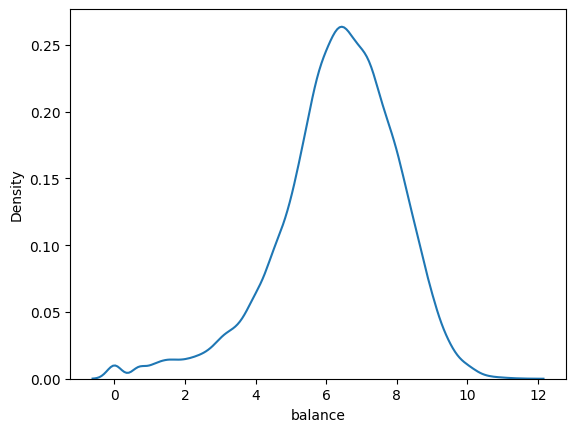

In [ ]:
import numpy as np
import seaborn as sns

sns.kdeplot(np.log(df_train['balance'])) #Basis Logaritma dalam bilang e (2.718...) ln(x)

In [ ]:
df_train["log_balance"] = np.log(df_train["balance"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_train[["balance","log_balance"]]

,balance,log_balance
0,2143,7.669962
1,29,3.367296
2,2,0.693147
3,1506,7.317212
4,1,0.000000
...,...,...
45206,825,6.715383
45207,1729,7.455298
45208,5715,8.650850
45209,668,6.504288


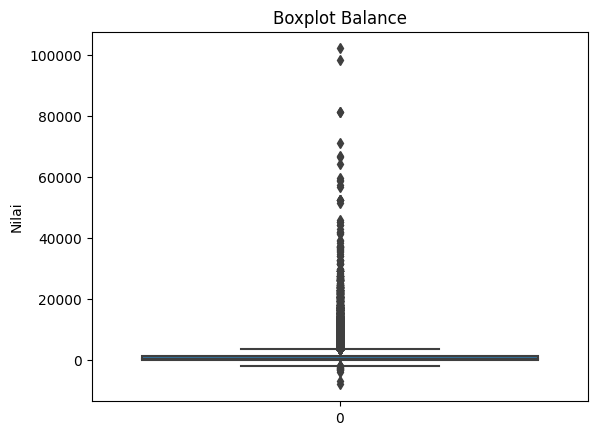

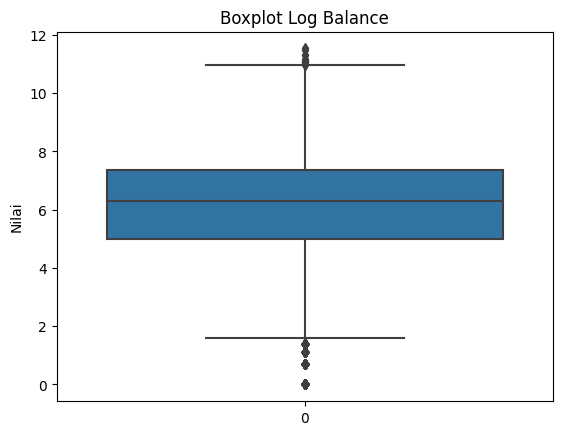

In [ ]:
#Perbandingan boxplot balance dan balance yang telah ditransformasi
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(df_train["balance"])
plt.title('Boxplot Balance')
plt.ylabel('Nilai')
plt.show()

sns.boxplot(df_train["log_balance"])
plt.title('Boxplot Log Balance')
plt.ylabel('Nilai')
plt.show()

In [ ]:
df_train[df_train["log_balance"] >= 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,log_balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,7.669962
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3.367296
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.693147
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,7.317212
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,6.715383
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,7.455298
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,8.650850
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,6.504288


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df_train['campaign_norm'] = minmax_scaler.fit_transform(df_train[['campaign']]) #Normalisasi

df_train['campaign_std'] = standard_scaler.fit_transform(df_train[['campaign']]) # Standarisasi


In [ ]:
df_train[['campaign', 'campaign_norm', 'campaign_std']].describe()

,campaign,campaign_norm,campaign_std
count,45211.000000,45211.000000,4.521100e+04
mean,2.763841,0.028449,3.017500e-17
std,3.098021,0.049968,1.000011e+00
min,1.000000,0.000000,-5.693506e-01
25%,1.000000,0.000000,-5.693506e-01
50%,2.000000,0.016129,-2.465603e-01
75%,3.000000,0.032258,7.622994e-02
max,63.000000,1.000000,1.944365e+01


- Memberikan alasan mengapa feature campaign yang diubah menjadi normalisasi dan standarisasi

-

## Feature Encoding

### Membuat Dummy Variabel Untuk Data Kategorikal
Data kategorikal perlu diolah agar dapat terbaca dalam model machine learning. Oleh sebab itu, dilakukan proses pengkodean variabel:
1. Dilakukan Pengkodean biner: job, marital, contact, poutcome
2. Dilakukan pemetaan pada data ordinal: education, month

#### Encoding Categorical (One-hot Encoding)

In [ ]:
# Proses Pengkodean Biner
pd.set_option('display.max_columns', 500)
for field in cats:
  df_train = pd.get_dummies(df_train, columns = [field], prefix = [field])
df_train

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,campaign_std,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,7.669962,0.000000,-0.569351,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,-1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,-1,0,no,0.693147,0.000000,-0.569351,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,-1,0,no,7.317212,0.000000,-0.569351,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,-1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes,6.715383,0.032258,0.076230,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,primary,no,1729,no,no,17,nov,456,2,-1,0,yes,7.455298,0.016129,-0.246560,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes,8.650850,0.064516,0.721811,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
45209,57,secondary,no,668,no,no,17,nov,508,4,-1,0,no,6.504288,0.048387,0.399020,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


#### Encoding Ordinal (Label encoding)

In [ ]:
# Pengkodean Data Ordinal
education_map = {"secondary": 2, "tertiary":3, "primary":1, "unknown":0}
df_train.education = df_train.education.map(education_map)

month_map = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
             "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec":12}
df_train.month = df_train.month.map(month_map)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  int64  
 2   default            45211 non-null  object 
 3   balance            45211 non-null  int64  
 4   housing            45211 non-null  object 
 5   loan               45211 non-null  object 
 6   day                45211 non-null  int64  
 7   month              45211 non-null  int64  
 8   duration           45211 non-null  int64  
 9   campaign           45211 non-null  int64  
 10  pdays              45211 non-null  int64  
 11  previous           45211 non-null  int64  
 12  y                  45211 non-null  object 
 13  log_balance        41445 non-null  float64
 14  campaign_norm      45211 non-null  float64
 15  campaign_std       45211 non-null  float64
 16  job_admin.         452

#### Encoding Binary (Label encoding)

In [ ]:
# label encoding data binary (default, housing, loan, y)
mapping_default= {
    'yes' : 1,
    'no' : 0}

mapping_housing= {
    'yes' : 1,
    'no' : 0}

mapping_loan= {
    'yes' : 1,
    'no' : 0}

df_train.default = df_train.default.map(mapping_default)
df_train.housing = df_train.housing.map(mapping_housing)
df_train.loan = df_train.loan.map(mapping_loan)

In [ ]:
pd.set_option('display.max_columns', 500)
df_train

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,campaign_std,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,-1,0,no,7.669962,0.000000,-0.569351,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,-1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,-1,0,no,0.693147,0.000000,-0.569351,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,-1,0,no,7.317212,0.000000,-0.569351,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,-1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,-1,0,yes,6.715383,0.032258,0.076230,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,1,0,1729,0,0,17,11,456,2,-1,0,yes,7.455298,0.016129,-0.246560,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,2,0,5715,0,0,17,11,1127,5,184,3,yes,8.650850,0.064516,0.721811,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
45209,57,2,0,668,0,0,17,11,508,4,-1,0,no,6.504288,0.048387,0.399020,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


# Feature Engineering (35 Poin)

## Feature Extraction

In [ ]:
#Feature Engineering
df_train["log_balance"] = np.log(df_train["balance"])

# menandai nasabah yang baru dihubungi
df_train["new"] = np.where(df_train["pdays"] == -1, 1, 0)

# nasabah dengan utang bank
df_train["in_debt"] = np.where(df_train["balance"] < 0, 1, 0)

# penggila ke nasabah terindikasi spam
df_train["spam"] = np.where(df_train["campaign"] >= 3, 1, 0)

# age
df_train["Gen Z"] = np.where(df_train["age"] <= 26, 1, 0)

# nasabah bawel
df_train["sassy"] = np.where(df_train["duration"] >= 600, 1, 0)

# nasabah punya tanggungan
df_train["dependent"] = np.where((df_train["housing"] == 1) | (df_train['loan'] == 1), 1, 0)

df_train

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,campaign_std,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new,in_debt,spam,Gen Z,sassy,dependent
0,58,3,0,2143,1,0,5,5,261,1,-1,0,no,7.669962,0.000000,-0.569351,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,-1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,-1,0,no,0.693147,0.000000,-0.569351,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,-1,0,no,7.317212,0.000000,-0.569351,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,-1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,-1,0,yes,6.715383,0.032258,0.076230,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0
45207,71,1,0,1729,0,0,17,11,456,2,-1,0,yes,7.455298,0.016129,-0.246560,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
45208,72,2,0,5715,0,0,17,11,1127,5,184,3,yes,8.650850,0.064516,0.721811,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
45209,57,2,0,668,0,0,17,11,508,4,-1,0,no,6.504288,0.048387,0.399020,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0


<ipython-input-276-8fad8ce519bc>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

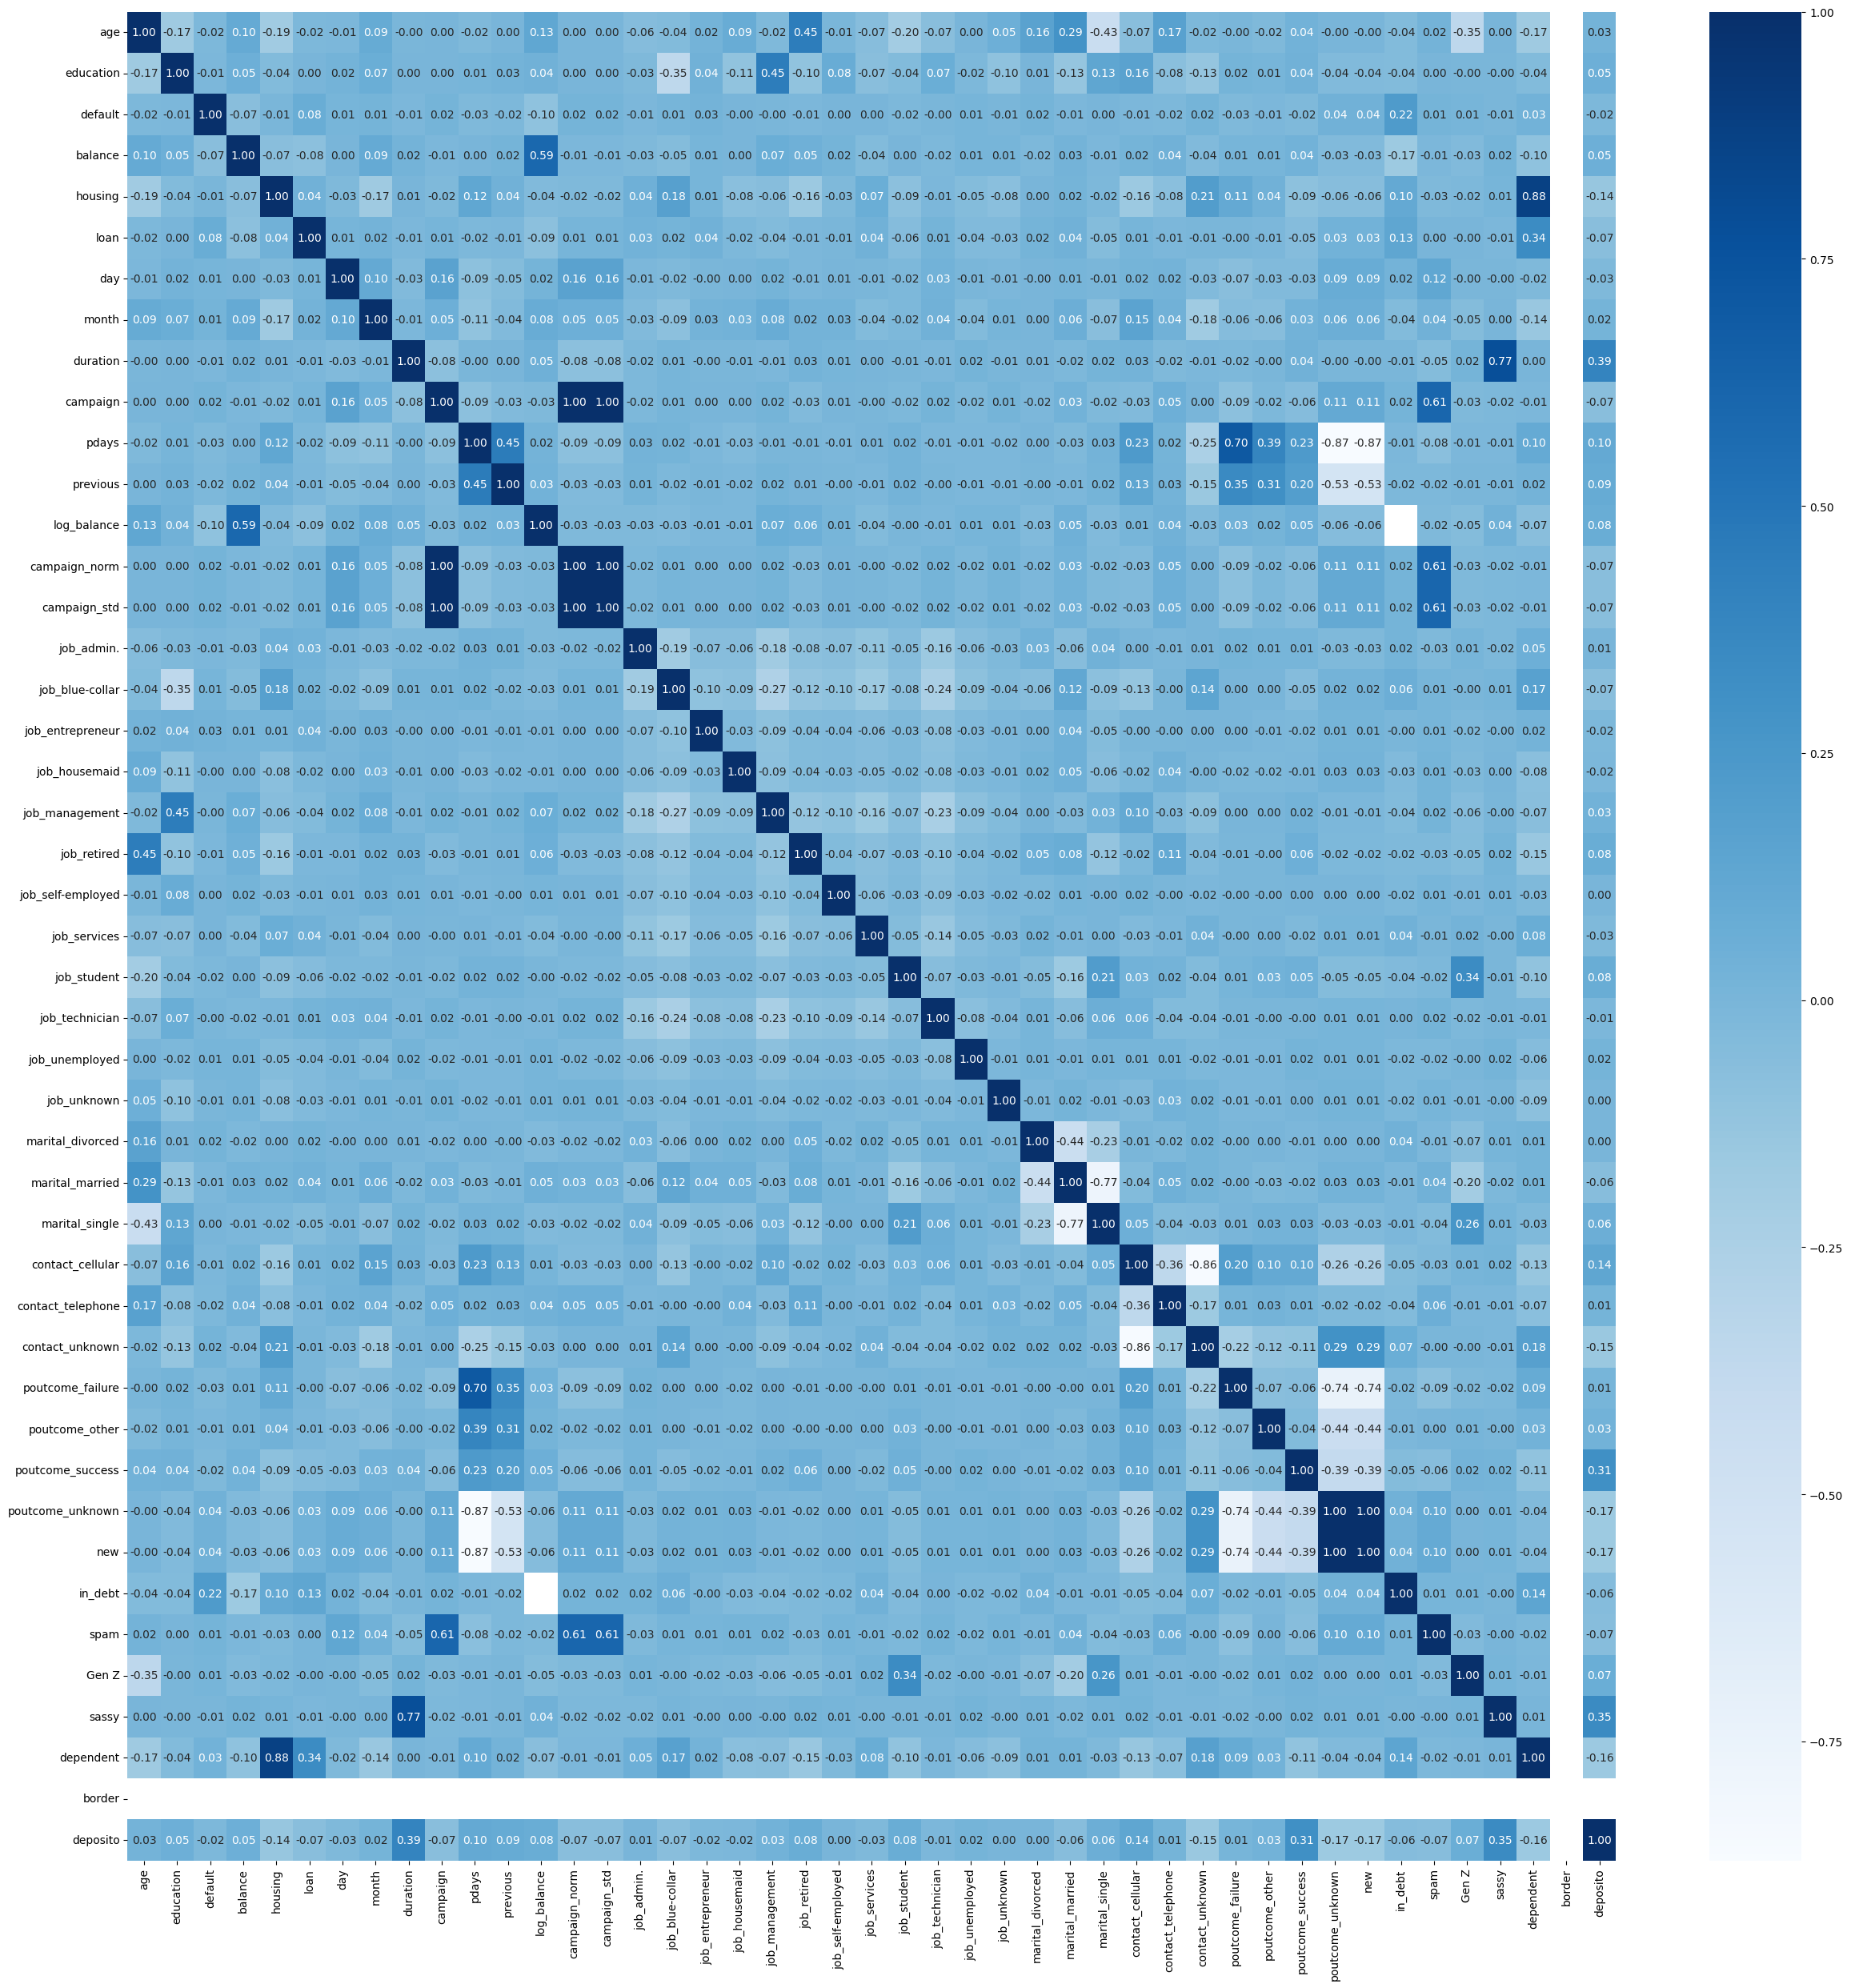

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#making border for corr matrix
df_train["border"] = 0
df_train["deposito"] = np.where(df_train["y"] == "yes", 1, 0)

plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_train

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,campaign_std,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new,in_debt,spam,Gen Z,sassy,dependent,border,deposito
0,58,3,0,2143,1,0,5,5,261,1,-1,0,no,7.669962,0.000000,-0.569351,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
1,44,2,0,29,1,0,5,5,151,1,-1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
2,33,2,0,2,1,1,5,5,76,1,-1,0,no,0.693147,0.000000,-0.569351,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
3,47,0,0,1506,1,0,5,5,92,1,-1,0,no,7.317212,0.000000,-0.569351,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
4,33,0,0,1,0,0,5,5,198,1,-1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,-1,0,yes,6.715383,0.032258,0.076230,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,None,1
45207,71,1,0,1729,0,0,17,11,456,2,-1,0,yes,7.455298,0.016129,-0.246560,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,None,1
45208,72,2,0,5715,0,0,17,11,1127,5,184,3,yes,8.650850,0.064516,0.721811,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,None,1
45209,57,2,0,668,0,0,17,11,508,4,-1,0,no,6.504288,0.048387,0.399020,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,None,0


## Feature Selection
- membuang feature yang tidak relevan
- membuang feature yang redundant
- mengurangi fitur


**1. Selection Khusus pada Featurese yang sudah dilakukan extraction terlebih dahulu**


<Axes: >

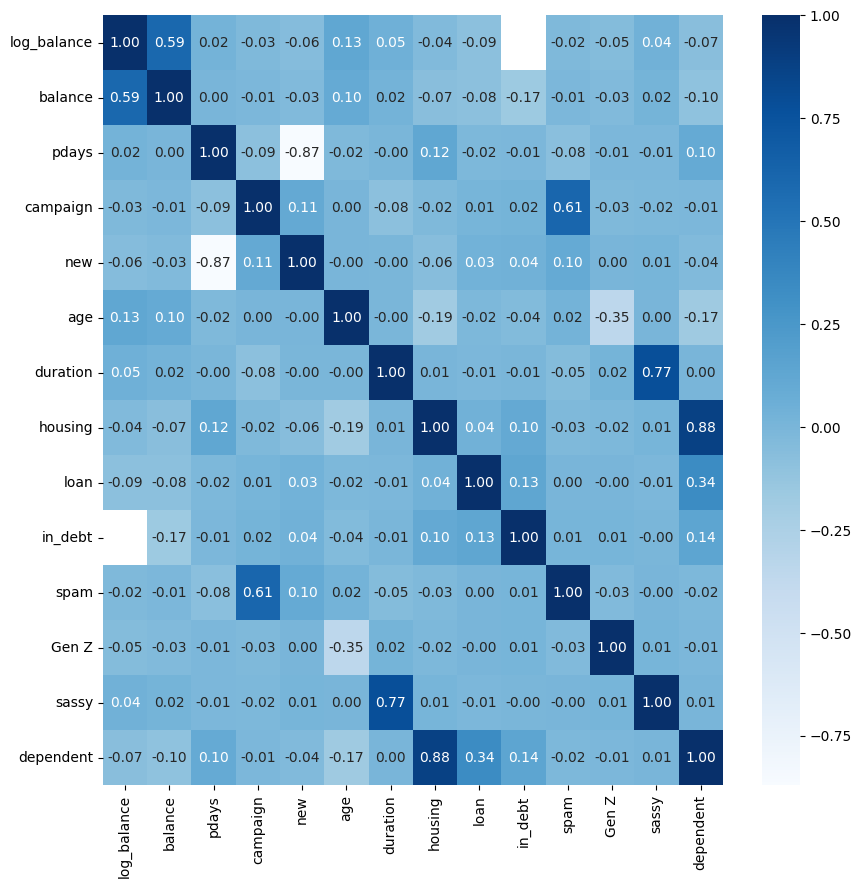

In [ ]:
df_extraction_train = df_train[["log_balance","balance", "pdays", "campaign", "new","age", "duration", "housing","loan", "in_debt","spam","Gen Z","sassy","dependent"]]

plt.figure(figsize=(10, 10))
sns.heatmap(df_extraction_train.corr(), cmap='Blues', annot=True, fmt='.2f')

**Insight**

1. Log_balance & balance = korelasi lumayan tinggi tapi masih dibawah 0.7, yaitu 0.59. kayaknya di drop aja yg balance nya supaya lebih cepet proses ML nya berhubung data nya sudah di log juga (?)
2. campaign = korelasi dengan spam cukup tinggi, 0.61 . not sure di drop apa engga
3. pdays dan new = nilai korelasi -0.87 --> hubungan linear negatif yang kuat. tapi apakah ada kausalitas? --> im not sure, artinya semakin banyak jumlah days of called yg terlewati semakin baru new nya (?) tapi kayaknya ini hapus aja yg pdays
4. age = korelasi negatif sm gen z tapi wajar dan aman
5. duration dan sassy = korelasi tinggi 0.77 akan menghapus duration
6. dependent = sepertinya nilai korelasinya -0.1 semua, belum tau mau diapain
7. pdays, housing, loan = aman

In [ ]:
#kita copy dulu biar ga risky
df_train_drop = df_train

#drop fitur balance, pdays, duration (belum tau sdh tepat atau belum)
columns_to_drop = ["balance", "pdays", "duration"]
df_train_drop = df_train_drop.drop(columns_to_drop, axis=1)
df_train_drop

,age,education,default,housing,loan,day,month,campaign,previous,y,log_balance,campaign_norm,campaign_std,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new,in_debt,spam,Gen Z,sassy,dependent,border,deposito
0,58,3,0,1,0,5,5,1,0,no,7.669962,0.000000,-0.569351,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
1,44,2,0,1,0,5,5,1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
2,33,2,0,1,1,5,5,1,0,no,0.693147,0.000000,-0.569351,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
3,47,0,0,1,0,5,5,1,0,no,7.317212,0.000000,-0.569351,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0
4,33,0,0,0,0,5,5,1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,0,0,17,11,3,0,yes,6.715383,0.032258,0.076230,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,None,1
45207,71,1,0,0,0,17,11,2,0,yes,7.455298,0.016129,-0.246560,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,None,1
45208,72,2,0,0,0,17,11,5,3,yes,8.650850,0.064516,0.721811,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,None,1
45209,57,2,0,0,0,17,11,4,0,no,6.504288,0.048387,0.399020,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,None,0


**2. Selection fitur-fitur job**

kategorik job di label ulang dengan mempertahankan top 3 population job (bluecolar, management, techincian) serta student & retirement karena memiliki pengaruh yang cukup signifikan pada deposito, sisanya akan diklasifikasikan sebagai others)

opsi ke 2 = mengklasifikasikan job berdasarkan jumlah presentase membuka deposito ?? (blm dilakukan)

A. dibawah 10% = blue-colar, enterpreneur, housemaid, services

B. 10 - 15% = teknis, self-employed, unknown, management, admin, unemployed

C. > 20% = retired

D. > 25% = student

In [ ]:
#list job_ yang diklasifikasikan sebagai others = 'job_admin', 'job_entrepreneur','job_housemaid','job_self-employed', 'job_services', 'job_unemployed', 'job_unknown'
# Membuat kolom baru 'job_others'
df_train_drop['job_others'] = ''

# Mengisi nilai pada kolom 'job_others' berdasarkan ketentuan

job_columns = ['job_admin.', 'job_entrepreneur', 'job_housemaid',
                   'job_self-employed', 'job_services', 'job_unemployed', 'job_unknown']
def assign_job(row):


    selected_jobs = [col.replace('job_', '') for col in job_columns if row[col] == 1]

    if len(selected_jobs) == 0:
        return 'top3'

df_train_drop['job_others'] = df_train_drop.apply(assign_job, axis=1)

# Menghapus kolom-kolom pekerjaan yang telah digabungkan ke dalam 'job_others'
df_train_drop.drop(columns=job_columns, inplace=True)
df_train_drop

,age,education,default,housing,loan,day,month,campaign,previous,y,log_balance,campaign_norm,campaign_std,job_blue-collar,job_management,job_retired,job_student,job_technician,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new,in_debt,spam,Gen Z,sassy,dependent,border,deposito,job_others
0,58,3,0,1,0,5,5,1,0,no,7.669962,0.000000,-0.569351,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,top3
1,44,2,0,1,0,5,5,1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,top3
2,33,2,0,1,1,5,5,1,0,no,0.693147,0.000000,-0.569351,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,None
3,47,0,0,1,0,5,5,1,0,no,7.317212,0.000000,-0.569351,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,top3
4,33,0,0,0,0,5,5,1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,None,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,0,0,17,11,3,0,yes,6.715383,0.032258,0.076230,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,None,1,top3
45207,71,1,0,0,0,17,11,2,0,yes,7.455298,0.016129,-0.246560,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,None,1,top3
45208,72,2,0,0,0,17,11,5,3,yes,8.650850,0.064516,0.721811,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,None,1,top3
45209,57,2,0,0,0,17,11,4,0,no,6.504288,0.048387,0.399020,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,None,0,top3


In [ ]:
#mengisi nilai None menjadi 1
df_train_drop['job_others'].fillna(1, inplace=True)

#mengubah nilai top3 menjadi 0
df_train_drop['job_others'] = df_train_drop['job_others'].replace('top3', 0)
df_train_drop

,age,education,default,housing,loan,day,month,campaign,previous,y,log_balance,campaign_norm,campaign_std,job_blue-collar,job_management,job_retired,job_student,job_technician,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new,in_debt,spam,Gen Z,sassy,dependent,border,deposito,job_others
0,58,3,0,1,0,5,5,1,0,no,7.669962,0.000000,-0.569351,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,0
1,44,2,0,1,0,5,5,1,0,no,3.367296,0.000000,-0.569351,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,0
2,33,2,0,1,1,5,5,1,0,no,0.693147,0.000000,-0.569351,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,1
3,47,0,0,1,0,5,5,1,0,no,7.317212,0.000000,-0.569351,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,None,0,0
4,33,0,0,0,0,5,5,1,0,no,0.000000,0.000000,-0.569351,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,0,0,17,11,3,0,yes,6.715383,0.032258,0.076230,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,None,1,0
45207,71,1,0,0,0,17,11,2,0,yes,7.455298,0.016129,-0.246560,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,None,1,0
45208,72,2,0,0,0,17,11,5,3,yes,8.650850,0.064516,0.721811,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,None,1,0
45209,57,2,0,0,0,17,11,4,0,no,6.504288,0.048387,0.399020,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,None,0,0


<ipython-input-275-e363740ce715>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train_drop.corr()


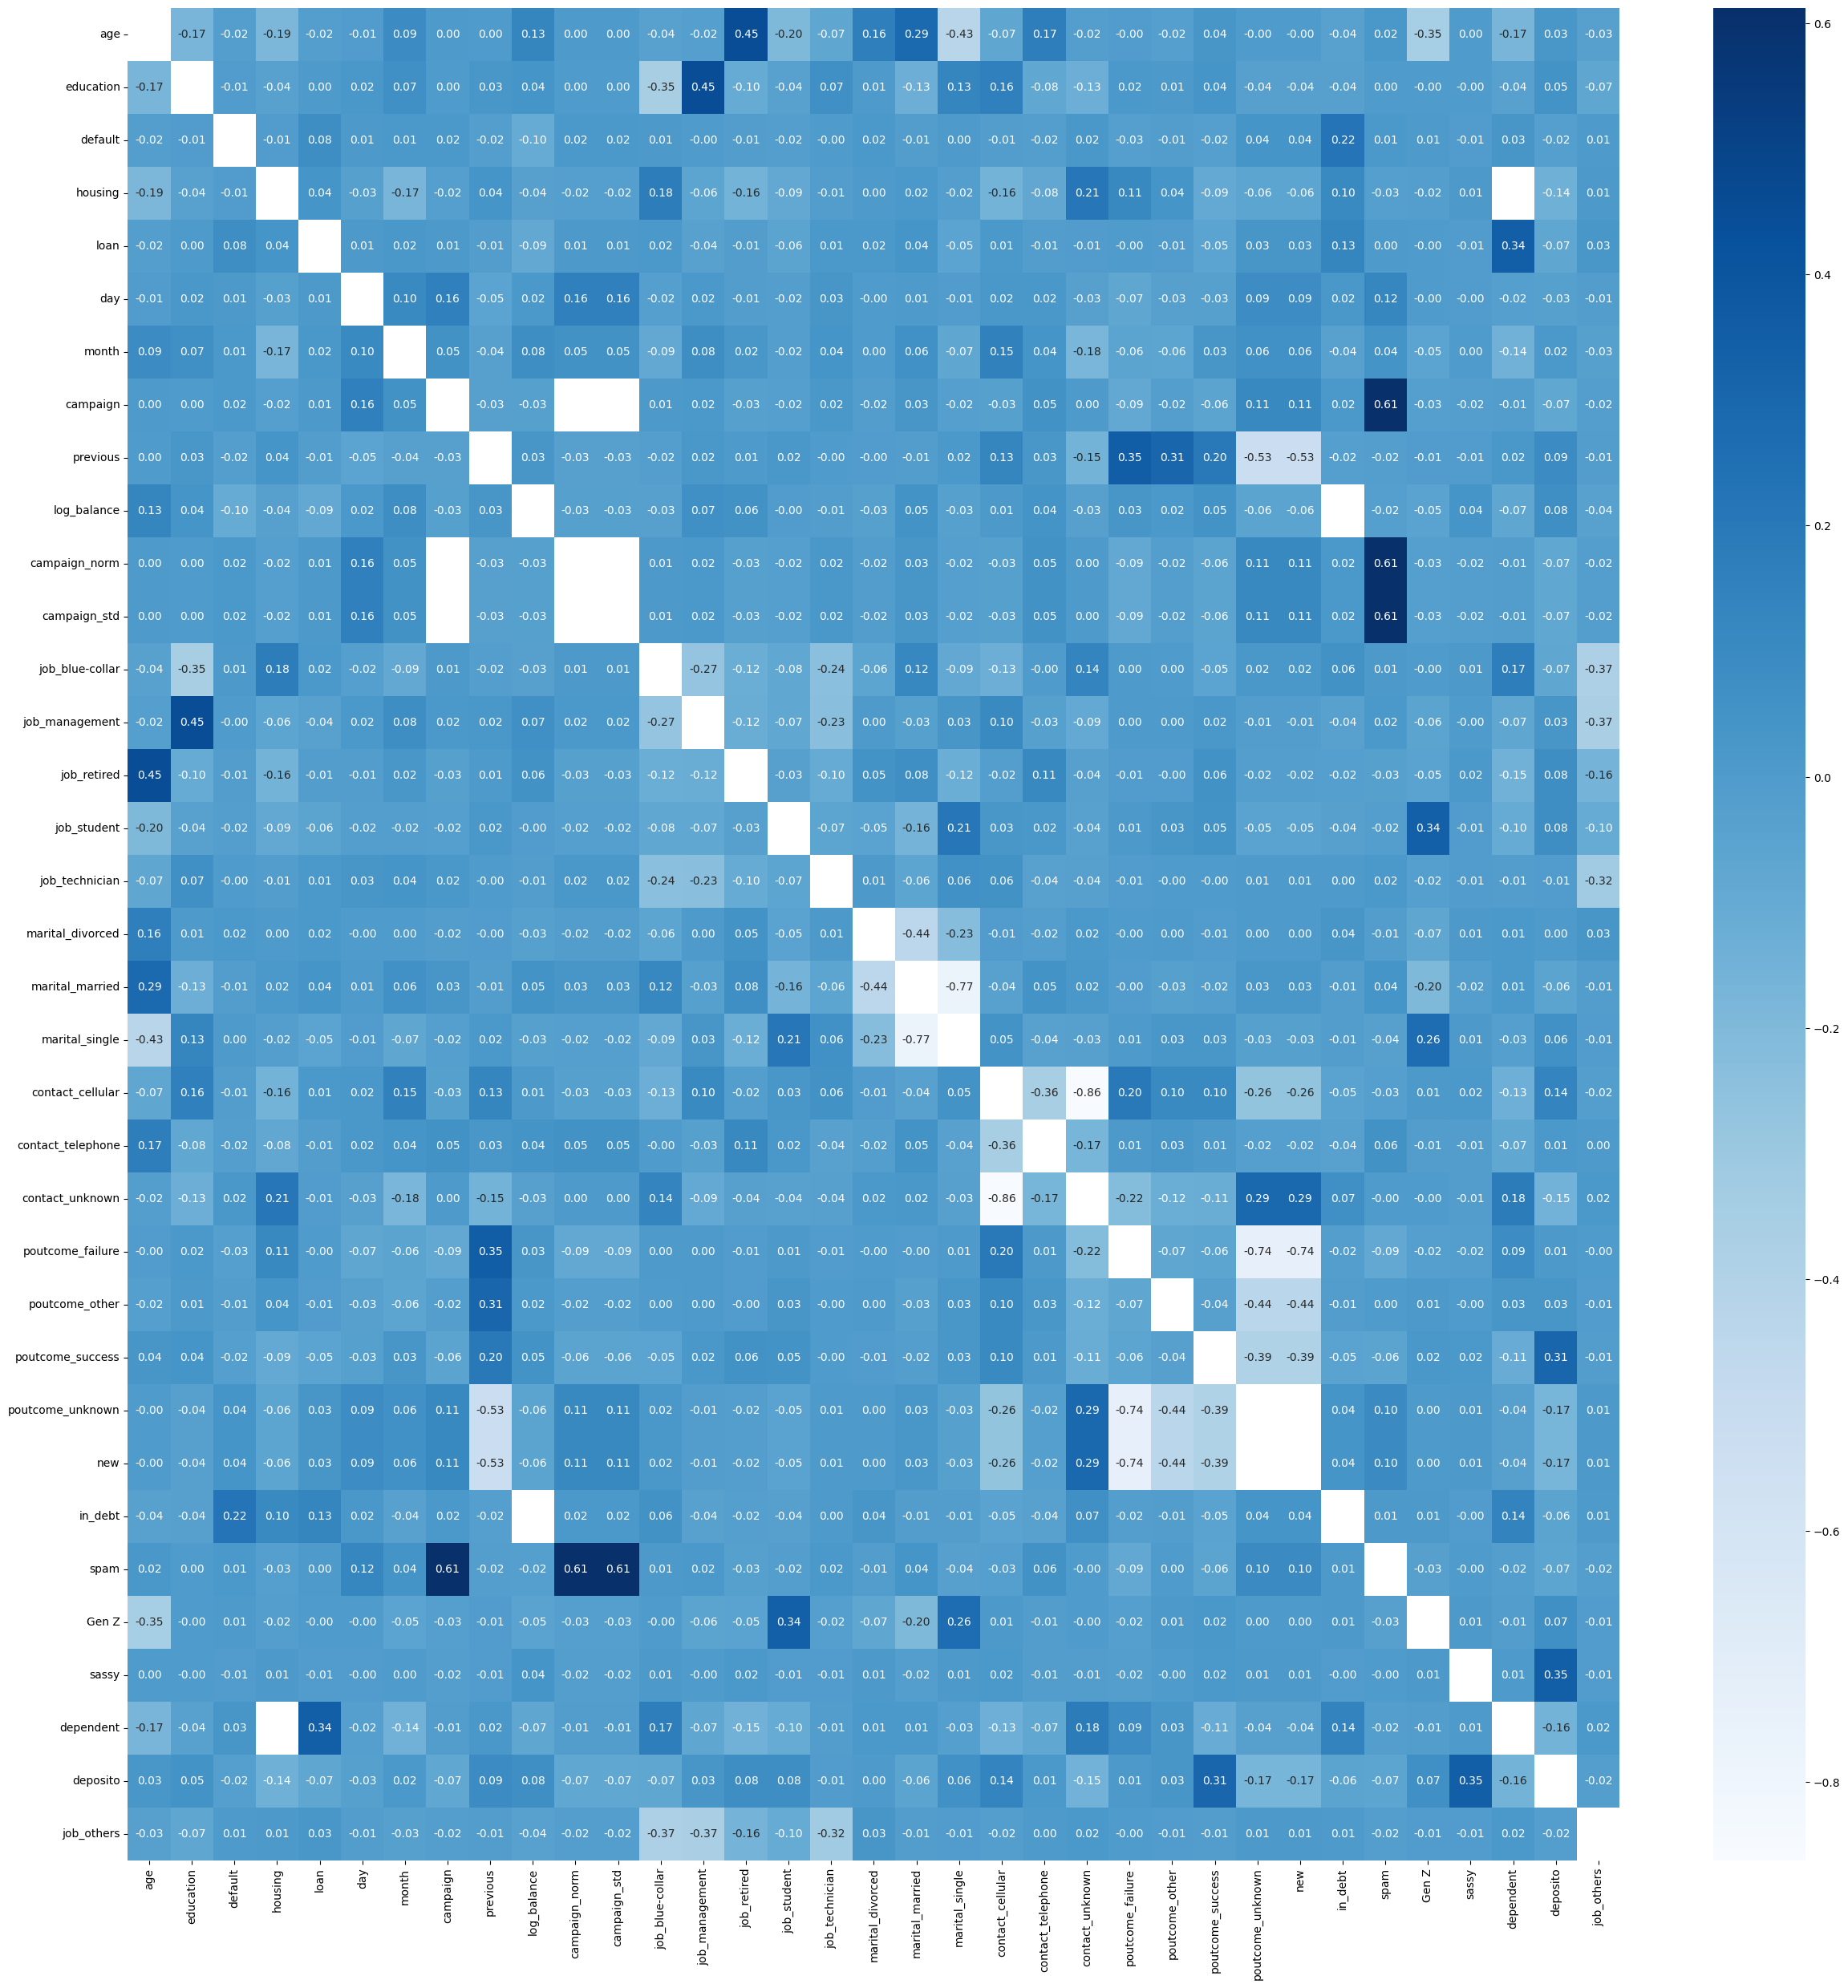

In [ ]:
#melihat korelasi pake job_others

#making border for corr matrix
df_train_drop["border"] = None
df_train_drop["deposito"] = np.where(df_train["y"] == "yes", 1, 0)

plt.figure(figsize=(30, 30))
correlation_matrix = df_train_drop.corr()
mask = correlation_matrix >= 0.70   #mencoba filter nilai yang di atas 0.70 tapi kayaknya tdk berhasil :')
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt='.2f', mask=mask)
plt.show()

- tidak ada korelasi yang terbilang tinggi (> 0.7)
- korelasi yang agak tinggi terdapat di spam dengan campaign (0.61)